2 つの CSV ファイルを読み込み、各ルールにおける precision（適合率）と recall（再現率）を計算


In [155]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Hiragino Sans'

In [156]:
# CSVファイルの読み込み
gemini_df = pd.read_csv('../../data/test/sampling_check_by_gemini_updated.csv')
human_df = pd.read_csv('../../data/test/sampling_check_by_human_updated.csv')


# 出力先のパス
output_path = '../../data/test/sampling_check_metrics_updated.csv'

In [157]:
# 評価結果を格納する辞書
metrics = {}

# 対象となるルールを抽出（rule1 ~ rule31）
rules = [f'rule{i}' for i in range(1, 32)]

# 各ルールについて計算
for rule in rules:
    # True Positives (TP): Geminiと人間判定が両方 "yes"
    tp = ((gemini_df[rule] == 'yes') & (human_df[rule] == 'yes')).sum()
    
    # False Positives (FP): Geminiが "yes" だが、人間判定が "no"
    fp = ((gemini_df[rule] == 'yes') & (human_df[rule] == 'no')).sum()
    
    # False Negatives (FN): Geminiが "no" だが、人間判定が "yes"
    fn = ((gemini_df[rule] == 'no') & (human_df[rule] == 'yes')).sum()
    
    # True Negatives (TN): Geminiと人間判定が両方 "no"
    tn = ((gemini_df[rule] == 'no') & (human_df[rule] == 'no')).sum()
    
    # Precision（適合率）
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    # Recall（再現率）
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    # F1スコア
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Accuracy（正確度）
    accuracy = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0 else 0
    
    # 辞書に結果を保存
    metrics[rule] = {
        'TP': tp,
        'FP': fp,
        'FN': fn,
        'TN': tn,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'Accuracy': accuracy
    }

# 結果をDataFrameに変換
metrics_df = pd.DataFrame(metrics).T
metrics_df.index.name = 'Rule'
metrics_df.reset_index(inplace=True)

# 平均値の行を削除
metrics_df = metrics_df[metrics_df['Rule'] != 'Average']

# Ruleカラムの値を数字のみに変換
metrics_df['Rule'] = metrics_df['Rule'].str.replace('rule', '').astype(int)

# 表示
print(metrics_df)

    Rule    TP    FP    FN    TN  Precision    Recall  F1 Score  Accuracy
0      1  61.0  30.0   1.0   5.0   0.670330  0.983871  0.797386  0.680412
1      2  22.0  35.0   8.0  32.0   0.385965  0.733333  0.505747  0.556701
2      3   8.0   8.0  12.0  69.0   0.500000  0.400000  0.444444  0.793814
3      4  33.0  20.0   8.0  36.0   0.622642  0.804878  0.702128  0.711340
4      5  85.0   5.0   6.0   1.0   0.944444  0.934066  0.939227  0.886598
5      6  10.0   3.0  40.0  44.0   0.769231  0.200000  0.317460  0.556701
6      7  60.0  15.0  15.0   7.0   0.800000  0.800000  0.800000  0.690722
7      8  44.0   3.0  29.0  21.0   0.936170  0.602740  0.733333  0.670103
8      9  15.0  25.0   5.0  52.0   0.375000  0.750000  0.500000  0.690722
9     10  12.0   4.0  23.0  58.0   0.750000  0.342857  0.470588  0.721649
10    11  82.0  12.0   0.0   3.0   0.872340  1.000000  0.931818  0.876289
11    12  27.0  38.0   0.0  32.0   0.415385  1.000000  0.586957  0.608247
12    13  15.0  15.0   5.0  62.0   0.5

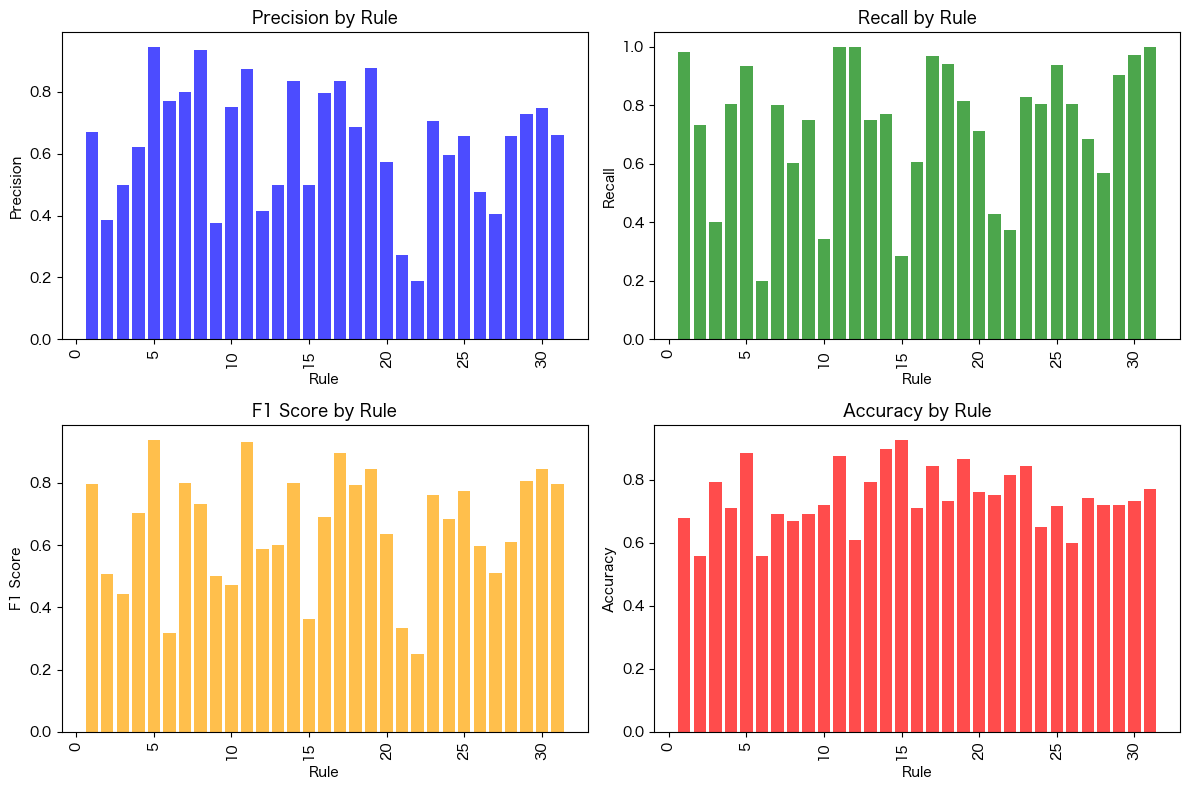

In [158]:
def plot_metrics(metrics_df):
    """
    Precision, Recall, F1 Score, Accuracy の棒グラフを表示する。
    Args:
        metrics_df (DataFrame): メトリクスを含むデータフレーム。
    """
    # メトリクスを抽出
    rules = metrics_df['Rule']  # ルール名
    precision = metrics_df['Precision']
    recall = metrics_df['Recall']
    f1_score = metrics_df['F1 Score']
    accuracy = metrics_df['Accuracy']
    
    # グラフサイズ設定
    plt.figure(figsize=(12, 8))
    
    # Precisionの棒グラフ
    plt.subplot(2, 2, 1)
    plt.bar(rules, precision, color='blue', alpha=0.7)
    plt.title('Precision by Rule')
    plt.xlabel('Rule')
    plt.ylabel('Precision')
    plt.xticks(rotation=90)
    
    # Recallの棒グラフ
    plt.subplot(2, 2, 2)
    plt.bar(rules, recall, color='green', alpha=0.7)
    plt.title('Recall by Rule')
    plt.xlabel('Rule')
    plt.ylabel('Recall')
    plt.xticks(rotation=90)
    
    # F1 Scoreの棒グラフ
    plt.subplot(2, 2, 3)
    plt.bar(rules, f1_score, color='orange', alpha=0.7)
    plt.title('F1 Score by Rule')
    plt.xlabel('Rule')
    plt.ylabel('F1 Score')
    plt.xticks(rotation=90)
    
    # Accuracyの棒グラフ
    plt.subplot(2, 2, 4)
    plt.bar(rules, accuracy, color='red', alpha=0.7)
    plt.title('Accuracy by Rule')
    plt.xlabel('Rule')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=90)
    
    # レイアウト調整
    plt.tight_layout()
    plt.show()

# 実行例
# metrics_df を calculate_metrics 関数で生成済みと仮定
plot_metrics(metrics_df)

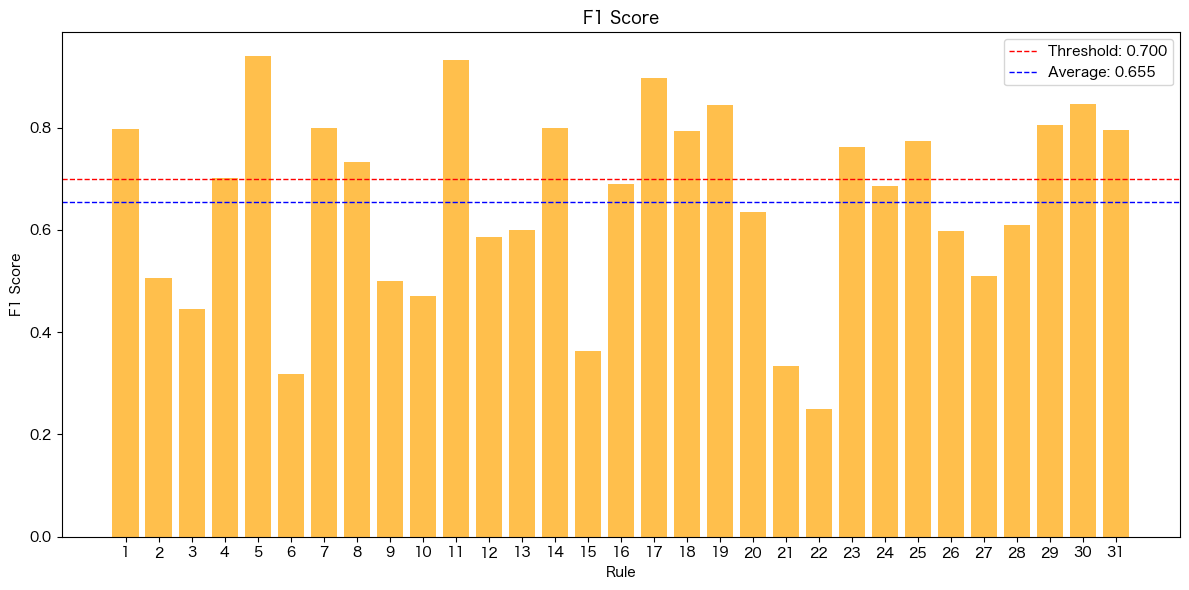

In [159]:
# F1 Scoreに関するグラフの描画
rules = metrics_df['Rule']  # ルール名
f1_score = metrics_df['F1 Score']  # F1スコア

# グラフサイズ設定
plt.figure(figsize=(12, 6))

# F1 Scoreの棒グラフ
plt.bar(rules, f1_score, color='orange', alpha=0.7)
plt.title('F1 Score')
plt.xlabel('Rule')
plt.ylabel('F1 Score')
plt.xticks(ticks=rules, labels=rules, rotation=0)

# 横線を2本追加
plt.axhline(y=0.70, color='red', linestyle='--', linewidth=1, label='Threshold: 0.700')
plt.axhline(y=0.655, color='blue', linestyle='--', linewidth=1, label='Average: 0.655')

# 凡例を追加
plt.legend()

# グラフの表示
plt.tight_layout()
plt.show()

In [160]:
new_rows = pd.DataFrame({"Rule": [24.5, 25.5]})
metrics_f_df = pd.concat([metrics_df, new_rows], ignore_index=True).sort_values(by="Rule").reset_index(drop=True)
metrics_f_df['Rule'] = range(1, len(metrics_f_df) + 1)

metrics_f_df

,Rule,TP,FP,FN,TN,Precision,Recall,F1 Score,Accuracy
0,1,61.0,30.0,1.0,5.0,0.670330,0.983871,0.797386,0.680412
1,2,22.0,35.0,8.0,32.0,0.385965,0.733333,0.505747,0.556701
2,3,8.0,8.0,12.0,69.0,0.500000,0.400000,0.444444,0.793814
3,4,33.0,20.0,8.0,36.0,0.622642,0.804878,0.702128,0.711340
4,5,85.0,5.0,6.0,1.0,0.944444,0.934066,0.939227,0.886598
5,6,10.0,3.0,40.0,44.0,0.769231,0.200000,0.317460,0.556701
6,7,60.0,15.0,15.0,7.0,0.800000,0.800000,0.800000,0.690722
7,8,44.0,3.0,29.0,21.0,0.936170,0.602740,0.733333,0.670103
8,9,15.0,25.0,5.0,52.0,0.375000,0.750000,0.500000,0.690722
9,10,12.0,4.0,23.0,58.0,0.750000,0.342857,0.470588,0.721649


In [161]:
# 指定されたRuleカラムの行を削除
rules_to_remove = [15, 21, 22, 25, 27]
filtered_df = metrics_f_df[~metrics_f_df['Rule'].isin(rules_to_remove)]


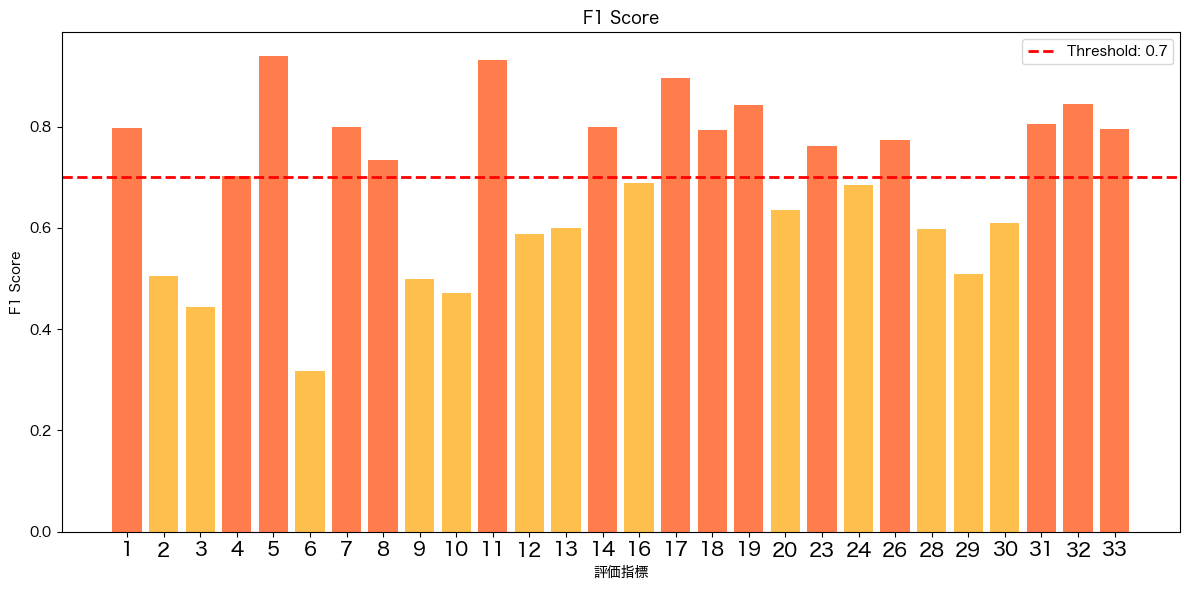

In [167]:
# F1 Scoreに関するグラフの描画
rules = filtered_df['Rule']  # ルール名
f1_score = filtered_df['F1 Score']  # F1スコア

indices = range(len(rules))

# グラフサイズ設定
plt.figure(figsize=(12, 6))

# 色を条件に応じて設定
colors = ['orangered' if score > 0.7 else 'orange' for score in f1_score]

# F1 Scoreの棒グラフ
plt.bar(indices, f1_score, color=colors, alpha=0.7)
plt.title('F1 Score')
plt.xlabel('評価指標')
plt.ylabel('F1 Score')
plt.xticks(ticks=indices, labels=rules, rotation=0, fontsize=14)

# 横線を2本追加
plt.axhline(y=0.7, color='red', linestyle='--', linewidth=2, label='Threshold: 0.7')

# 凡例を追加
plt.legend()

# グラフの表示
plt.tight_layout()
plt.savefig('../../data/results/graphs/f1_score_graph_average.png', dpi=300, bbox_inches='tight')

plt.show()

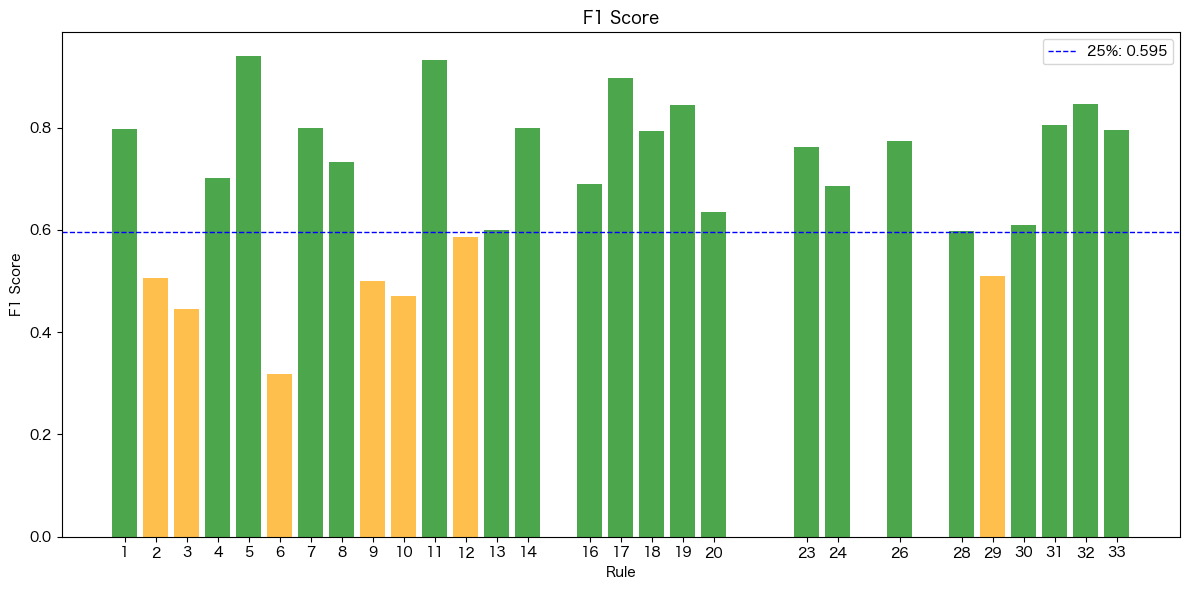

In [164]:
# F1 Scoreに関するグラフの描画
rules = filtered_df['Rule']  # ルール名
f1_score = filtered_df['F1 Score']  # F1スコア

# グラフサイズ設定
plt.figure(figsize=(12, 6))

# 色を条件に応じて設定
colors = ['green' if score > 0.5951 else 'orange' for score in f1_score]

# F1 Scoreの棒グラフ
plt.bar(rules, f1_score, color=colors, alpha=0.7)
plt.title('F1 Score')
plt.xlabel('Rule')
plt.ylabel('F1 Score')
plt.xticks(ticks=rules, labels=rules, rotation=0)

# 横線を2本追加
plt.axhline(y=0.5951, color='blue', linestyle='--', linewidth=1, label='25%: 0.595')

# 凡例を追加
plt.legend()

# グラフの表示
plt.tight_layout()
plt.savefig('../../data/results/graphs/f1_score_graph_25%.png', dpi=300, bbox_inches='tight')

plt.show()